<a href="https://colab.research.google.com/github/AshwinMahajan710/Deep-Learning-Practice-Projects/blob/main/03_Graduate_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
# data shape
data.shape

(400, 9)

In [9]:
# removing the unnecessary features
data.drop(columns=["Serial No."],inplace  = True)

In [10]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
# Train test split
X = data.iloc[:,0:-1]
y  = data.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [12]:
# Standardization of data using min max scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [13]:
X_train_scaled

array([[0.42      , 0.46428571, 0.5       , ..., 0.5       , 0.52884615,
        1.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ],
       [0.68      , 0.67857143, 0.5       , ..., 0.125     , 0.63782051,
        1.        ],
       ...,
       [0.68      , 0.64285714, 0.5       , ..., 0.5       , 0.77564103,
        1.        ],
       [0.54      , 0.64285714, 0.5       , ..., 0.875     , 0.74038462,
        1.        ],
       [0.26      , 0.46428571, 1.        , ..., 0.875     , 0.59294872,
        0.        ]])

In [14]:
# necessary imports
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
# Building model architecture
model = Sequential()
model.add(Dense(7,activation = 'relu',input_dim=7))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

In [32]:
# Model information
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Model compilation
model.compile(loss = 'mean_squared_error',optimizer='Adam',)

In [37]:
# Model training
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 5/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 6/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 11/100
8/8 [=====

In [35]:
# the predictions
y_preds = model.predict(X_test_scaled)

3/3 [==============================] - 0s 4ms/step


In [36]:
# Importing r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)

0.6736065153858866

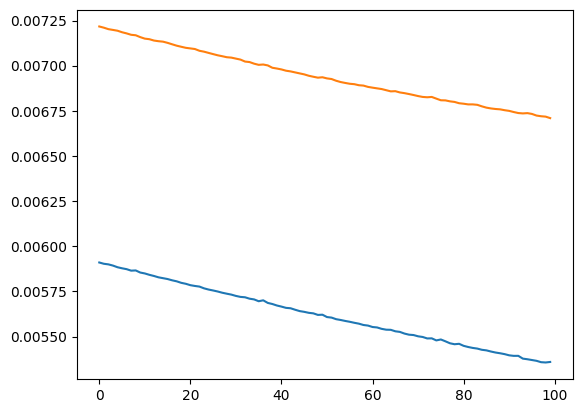

In [38]:
# Comparing validation loss and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])